# CLASSIFYING INSURANCE FRAUD THROUGH PREDICTIVE MODELLING

## Table of Contents

1. Importing Libraries
2. Importing Dataset
3. Initial Investigation / EDA
4. Data Cleaning/Further EDA
5. Splitting Dependent and Independent Variables
6. Train Test Split
7. Feature Engineering
8. Baseline Models
9. Down sampling
10. Models with Down sampling Applied
11. Upsampling with SMOTE
12. Models with Upsampling Applied
13. Feature Importance
14. Evaluating Models
15. Ensembling
16. Stacking
17. Evaluating Models with Ensembling and Stacking
18. Evaluating Best Models on Test Data

## 1. IMPORTING LIBRARIES

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics\
import accuracy_score as accuracy,\
        recall_score as recall,\
        precision_score as precision,\
        f1_score as f1
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier

## 2. IMPORTING DATASET

In [2]:
df = pd.read_csv('fraud_oracle.csv', encoding = 'utf-8', encoding_errors='ignore')

## 3. INITAL INVESTIGATION / EDA

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [5]:
print(df.shape)
print("Observations in dataset is " + str(df.shape[0]) )
print("Features in dataset is " + str(df.shape[1]) )

(15420, 33)
Observations in dataset is 15420
Features in dataset is 33


#### Dataset contains 15,420 observations + 33 feature columns

In [6]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [7]:
df.dtypes.value_counts()

object    24
int64      9
dtype: int64

#### Dataset consists of 24 object data types and 9 integer data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

##### Same result with data types above. Upon inspection no nulls in dataset.
##### Let's confirm this below

In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

##### Confirmed that no nulls are present in the dataset

In [10]:
df.describe(include= 'all')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,8,9,2,2,2,4,5,5,NaN,3
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5807,5593,14992,15333,15179,7047,14324,14316,NaN,5962
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN


In [11]:
df['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [12]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

### Observations
   - 15,420 instances of Policy Number, should be able to drop this column
   - Month Claimed has 13 occurances, where there seems to be a 0 in a single row. I can drop this also.
   - Day of Week Claimed has 8 occurances, where I would expect 7, could be another 0. I can investigate further.
   - Age also contains a 0 value by looking unique values.

# 4. DATA CLEANING/FURTHER EDA

In [13]:
df[df['MonthClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Both Month Claimed, Age and DayofWeekClaimed is 0, so i will drop this row and check from additional occurances of DayOfWeekClaimed and Age being 0.

In [14]:
df = df[df['MonthClaimed'] != '0']

In [15]:

df[df['DayOfWeekClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


No further instances of DayOfWeekClaimed being 0. I'll now check Age.

In [16]:
df[df['Age']== 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils



A total of 319 occurrences where Age is 0, all of which are between the ages of 16-17, how can we deal with this?
I have a few options,
- Can I find the mean/median/mode based on Age of other Policy Holders?
- Can I remove nulls?
- Can I find a relationship between Age and AgeOfPolicyHolder? Are there any PolicyHolders who have an age of 16-17 with ages identified?

Lets investigate AgeOfPolicyHolder

In [17]:
df[df['AgeOfPolicyHolder'] == '16 to 17'].groupby(['AgeOfPolicyHolder']).agg({'Age': ['mean','count']})

Age      
                  mean count
AgeOfPolicyHolder           
16 to 17           0.0   319

All 319 Rows are where age is 0, I think it would be best to assume the age of these policy holders is 16.5.

In [18]:
df['Age'].replace({0:16.5}, inplace=True)

Check if this has worked as expected

In [19]:
df[df['AgeOfPolicyHolder'] == '16 to 17'].groupby(['AgeOfPolicyHolder']).agg({'Age': ['mean','count']})

Age      
                   mean count
AgeOfPolicyHolder            
16 to 17           16.5   319

Next step, Remove Policy Number where these are unique

In [20]:
df.drop(columns='PolicyNumber', inplace=True)

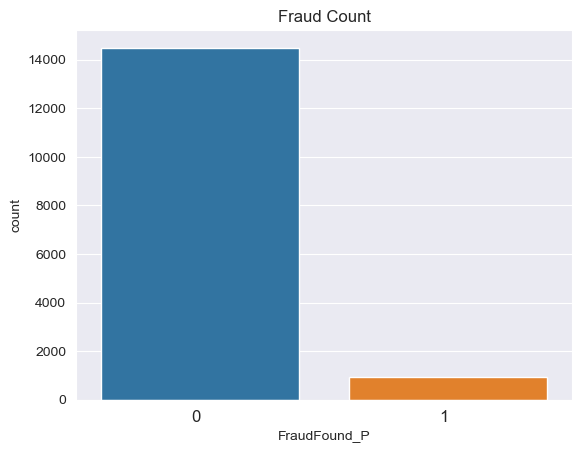

In [21]:
ax = sns.countplot(x= df['FraudFound_P'])
plt.title(f'Fraud Count')

plt.xticks(
    horizontalalignment='right',
    fontweight ='light',
    fontsize ='large', wrap = True
)
plt.show()

In [22]:
df['FraudFound_P'].value_counts()

0    14496
1      923
Name: FraudFound_P, dtype: int64

923 occurrences of fraud found, account for approx. 6% of total dataset

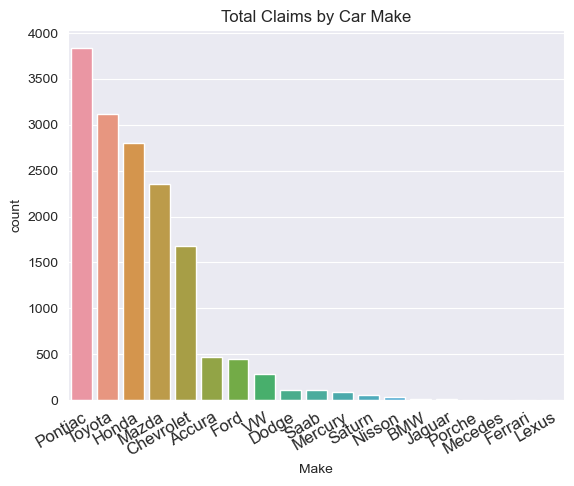

In [23]:

ax = sns.countplot(x=df['Make'], order= df['Make'].value_counts().index)
plt.title(f'Total Claims by Car Make')

plt.xticks(
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large', wrap=True
)
plt.show()

Majority of Claimants drove a Pontiac, Toyota, Honda or Mazda

In [24]:
df_nof=df[df['FraudFound_P']==0]
df_f=df[df['FraudFound_P']==1]

In [25]:
# def plot(category):
#     plt.rcParams["figure.figsize"] = [7.00, 3.50]
#     plt.rcParams["figure.autolayout"] = True
#     f, axes = plt.subplots(1, 2,figsize= (25,5))
#     sns.countplot(data=df_nof,x=category,color="red", ax=axes[0], order=df_nof[category].value_counts().index)
#     sns.countplot(data=df_f,x=category, color="green", ax=axes[1], order=df_f[category].value_counts().index)
#     plt.show()

In [26]:
# plotlist = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
#             'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
#             'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
#             'VehiclePrice', 'RepNumber',
#             'Deductible', 'DriverRating', 'Days_Policy_Accident',
#             'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
#             'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
#             'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
#             'BasePolicy'
#             ]
#
# [plot(i) for i in plotlist]

## 5. SPLITTING DEPENDANT AND INDEPENDANT VARIABLES

In [27]:
X = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

## 6. TRAIN TEST SPLIT

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

## 7. FEATURE ENGINEERING

Appying one hot encoding in order to transform all categorical columns

In [29]:
def ohe(dataf):
    dataf = pd.get_dummies(dataf, columns = ['Month', 'DayOfWeek', 'Make', 'AccidentArea',
                                             'DayOfWeekClaimed', 'MonthClaimed', 'Sex',
                                             'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                                             'VehiclePrice','Days_Policy_Accident',
                                             'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
                                             'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
                                             'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
                                             'BasePolicy'
                                             ], drop_first=True)

    return dataf

In [30]:
X_train_eng=ohe(X_train)

## 8. BASELINE MODELS

Creating a function to visualise all results

In [31]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {accuracy(actual, predicted)}')
    print(f'The recall of your model is: {recall(actual, predicted)}')
    print(f'The precision of your model is: {precision(actual, predicted)}')
    print(f'The F1-score of your model is: {f1(actual, predicted)}')
    print(f'The ROC-AUC-score of your model is: {roc_auc_score(actual,predicted)}')

 ### 8.1 LOGISTIC REGRESSION

In [32]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = {'max_iter': [25, 50 , 75]},
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [33]:
grid_search.fit(X_train_eng, y_train)

C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [25, 50, 75]}, scoring='accuracy')

In [34]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_iter': 25}
0.9396831420168865


In [35]:
lgr = LogisticRegression(max_iter=25, random_state=10)
def lre(X,y):
    lgr.fit(X, y)
    lgr_results = X.copy()
    lgr_results[['Not Fraud', 'Fraud']] = lgr.predict_proba(X)
    lgr_results['y_pred'] = np.where(lgr_results['Fraud'] > 0.12, 1, 0)

    return lgr_results

In [36]:
 #APPLYING FUNCTION TO TRAIN

lgr_results =lre(X_train_eng, y_train)
get_results(y_train,lgr_results['y_pred'])
lgr_score = cross_validate(lgr, X_train_eng, y_train, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
lgr_score

C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The confusion matrix for your predictions is:
[[10142     0]
 [  651     0]] 

The accuracy of your model is: 0.9396831279533031
The recall of your model is: 0.0
The precision of your model is: 0.0
The F1-score of your model is: 0.0
The ROC-AUC-score of your model is: 0.5


C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'fit_time': array([0.07780695, 0.07614899, 0.07205796, 0.07799315, 0.07599568]),
 'score_time': array([0.01580215, 0.01914096, 0.01684189, 0.01835108, 0.01884937]),
 'test_accuracy': array([0.93978694, 0.93978694, 0.93932376, 0.93975904, 0.93975904]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.51265876, 0.5492247 , 0.57378758, 0.55536337, 0.54199666]),
 'test_matthews_corrcoef': array([0., 0., 0., 0., 0.])}

### 8.2 DECISION TREE'S

In [37]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [2, 4, 6],
                                  'min_samples_split': [2,4,6,8,10],
                                  'min_samples_leaf': [2,4,6,8,10]},
                    cv = 5,
                    refit = True,
                    verbose = 2,
                    scoring = 'accuracy')

In [38]:
grid.fit(X_train_eng, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [40]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2)

def dtf(X,y,dt):
    dt = dt.fit(X, y)
    dt_results = X.copy()
    dt_results['y_pred'] = dt.predict(X)
    dt_results['y_real'] = y
    dt_results['y_prob'] = dt.predict_proba(X)[:,1]
    dt_results['y_pred'] = np.where(dt_results['y_prob'] > 0.15, 1, 0)
    return dt_results

In [41]:
dt_results = dtf(X_train_eng, y_train,dt)
get_results(y_train,dt_results['y_pred'])
dt_score = cross_validate(dt, X_train_eng, y_train, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
dt_score

The confusion matrix for your predictions is:
[[9511  631]
 [ 455  196]] 

The accuracy of your model is: 0.8993792272769388
The recall of your model is: 0.3010752688172043
The precision of your model is: 0.2370012091898428
The F1-score of your model is: 0.2652232746955345
The ROC-AUC-score of your model is: 0.6194293717385173


{'fit_time': array([0.03690577, 0.03356838, 0.03800201, 0.03710723, 0.03471494]),
 'score_time': array([0.00953221, 0.00997114, 0.01039028, 0.010216  , 0.00908852]),
 'test_accuracy': array([0.94210283, 0.94210283, 0.94071329, 0.942076  , 0.94022243]),
 'test_f1': array([0.07407407, 0.10071942, 0.05882353, 0.10071942, 0.01526718]),
 'test_roc_auc': array([0.80302726, 0.82633923, 0.81730205, 0.807423  , 0.81782165]),
 'test_matthews_corrcoef': array([0.19034063, 0.1951655 , 0.14920378, 0.195161  , 0.08504274])}

### 8.3 RANDOM FORESTS

In [42]:
#DETERMINING BEST PARAMETERS FOR RANDOM FOREST CLASSIFIER

gs = GridSearchCV(RandomForestClassifier(),
                  param_grid={'max_depth': [2, 4, 6, 8],
                              'n_estimators': [10, 25, 50]},
                  cv=5)

In [43]:
gs.fit(X_train_eng, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 25, 50]})

In [44]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 2, 'n_estimators': 10}
0.9396831420168865


In [45]:
rf1 = RandomForestClassifier(n_estimators= 10, max_depth= 2)
def rff(X,y):
    rf1.fit(X, y)
    rf_results = X.copy()
    rf_results['y_pred'] = rf1.predict(X)
    rf_results['y_real'] = y
    rf_results['y_prob'] = rf1.predict_proba(X)[:,1]
    rf_results['y_pred'] = np.where(rf_results['y_prob'] > 0.12, 1, 0)
    return rf_results

In [46]:
rf_results = rff(X_train_eng, y_train)
get_results(y_train,rf_results['y_pred'])
rf_score = cross_validate(rf1, X_train_eng, y_train, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
rf_score

The confusion matrix for your predictions is:
[[10130    12]
 [  642     9]] 

The accuracy of your model is: 0.939405170017604
The recall of your model is: 0.013824884792626729
The precision of your model is: 0.42857142857142855
The F1-score of your model is: 0.026785714285714288
The ROC-AUC-score of your model is: 0.5063208431062325


{'fit_time': array([0.0396626 , 0.04074931, 0.03886986, 0.03906703, 0.03943682]),
 'score_time': array([0.01305962, 0.01300287, 0.01263094, 0.01187825, 0.01363587]),
 'test_accuracy': array([0.93978694, 0.93978694, 0.93932376, 0.93975904, 0.93975904]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.73894871, 0.70472002, 0.77000241, 0.69906881, 0.75249583]),
 'test_matthews_corrcoef': array([0., 0., 0., 0., 0.])}

#### Upon inspection of these results, we are yielding a high accuracy however low recall, precision and F1 score. The ROC AUC score is close to 0.5 also, which indicates randomness in results. We can identify this with an imbalanced dataset.

### How can we tackle this?
- Downsample through resample?
- Upsample using SMOTE?


### 9. DOWNSAMPLING

In [47]:
nf_downsample = resample(df_nof,
                          replace=True,
                          n_samples=len(df_f),
                          random_state=42)

print(nf_downsample.shape)

(923, 32)


In [48]:
df_downsampled = pd.concat([nf_downsample, df_f])

In [49]:

df_eng_ds=ohe(df_downsampled)

#### Now we need to split feature columns out once again and apply a train test split.

In [50]:
X1 = df_eng_ds.drop(columns=['FraudFound_P'])
y2 = df_eng_ds['FraudFound_P']
#APPLYING TRAIN TEST SPLIT

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y2, test_size=0.20, random_state=45)

## 10. MODELS WITH DOWNSAMPLING APPLIED

### 10.1 LOGISTIC REGRESSION

In [51]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = {'max_iter': [75, 150 , 200]},
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [52]:
grid_search.fit(X_train1, y_train1)

C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [75, 150, 200]}, scoring='accuracy')

In [53]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_iter': 150}
0.7405199267063673


In [54]:
lgr_ds = LogisticRegression(max_iter=150, random_state=10)
def lre_ds(X,y):
    lgr.fit(X, y)
    lgr_results = X.copy()
    lgr_results[['Not Fraud', 'Fraud']] = lgr.predict_proba(X)
    lgr_results['y_pred'] = np.where(lgr_results['Fraud'] > 0.5, 1, 0)

    return lgr_results

In [55]:
 #APPLYING FUNCTION TO TRAIN

lgrds_results =lre_ds(X_train1, y_train1)
get_results(y_train1,lgrds_results['y_pred'])
lgrds_score = cross_validate(lgr, X_train1, y_train1, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
lgrds_score

The confusion matrix for your predictions is:
[[329 410]
 [298 439]] 

The accuracy of your model is: 0.5203252032520326
The recall of your model is: 0.5956580732700135
The precision of your model is: 0.5170789163722026
The F1-score of your model is: 0.55359394703657
The ROC-AUC-score of your model is: 0.5204271421830446


C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'fit_time': array([0.01654053, 0.01508713, 0.01614785, 0.01117039, 0.01215291]),
 'score_time': array([0.00863028, 0.01133919, 0.00963378, 0.00863385, 0.00797415]),
 'test_accuracy': array([0.50675676, 0.55254237, 0.67118644, 0.5220339 , 0.50508475]),
 'test_f1': array([0.52903226, 0.52857143, 0.66202091, 0.54368932, 0.54375   ]),
 'test_roc_auc': array([0.49958912, 0.54789483, 0.74108292, 0.53888582, 0.51608752]),
 'test_matthews_corrcoef': array([0.01357438, 0.10526196, 0.34264572, 0.0446174 , 0.00974182])}

### 10.2 DECISION TREE

In [56]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [2, 4, 6],
                                  'min_samples_split': [2,4,6,8,10],
                                  'min_samples_leaf': [2,4,6,8,10]},
                    cv = 5,
                    refit = True,
                    verbose = 2,
                    scoring = 'accuracy')

In [57]:
grid.fit(X_train1, y_train1)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy', verbose=2)

In [58]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.7696518552450756


In [59]:
dt_ds = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=10)

def dtf_ds(X,y):
    dt_ds.fit(X, y)
    dt_results = X.copy()
    dt_results['y_pred'] = dt_ds.predict(X)
    dt_results['y_real'] = y
    dt_results['y_prob'] = dt_ds.predict_proba(X)[:,1]
    dt_results['y_pred'] = np.where(dt_results['y_prob'] > 0.5, 1, 0)
    return dt_results

In [60]:
dtds_results = dtf_ds(X_train1, y_train1)
get_results(y_train1,dtds_results['y_pred'])
dtds_score = cross_validate(dt_ds, X_train1, y_train1, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
dt_score

The confusion matrix for your predictions is:
[[480 259]
 [ 67 670]] 

The accuracy of your model is: 0.7791327913279132
The recall of your model is: 0.9090909090909091
The precision of your model is: 0.721205597416577
The F1-score of your model is: 0.8043217286914766
The ROC-AUC-score of your model is: 0.7793086480501907


{'fit_time': array([0.03690577, 0.03356838, 0.03800201, 0.03710723, 0.03471494]),
 'score_time': array([0.00953221, 0.00997114, 0.01039028, 0.010216  , 0.00908852]),
 'test_accuracy': array([0.94210283, 0.94210283, 0.94071329, 0.942076  , 0.94022243]),
 'test_f1': array([0.07407407, 0.10071942, 0.05882353, 0.10071942, 0.01526718]),
 'test_roc_auc': array([0.80302726, 0.82633923, 0.81730205, 0.807423  , 0.81782165]),
 'test_matthews_corrcoef': array([0.19034063, 0.1951655 , 0.14920378, 0.195161  , 0.08504274])}

### 10.3 RANDOM FOREST

In [61]:
gs = GridSearchCV(RandomForestClassifier(),
                  param_grid={'max_depth': [2, 4, 6, 8],
                              'n_estimators': [10, 25, 50]},
                  cv=5)

In [62]:
gs.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 25, 50]})

In [63]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 8, 'n_estimators': 50}
0.774388456252863


In [64]:
rf = RandomForestClassifier(n_estimators= 50, max_depth= 6)
def rff_ds(X,y):
    rf.fit(X, y)
    rf_results = X.copy()
    rf_results['y_pred'] = rf.predict(X)
    rf_results['y_real'] = y
    rf_results['y_prob'] = rf.predict_proba(X)[:,1]
    rf_results['y_pred'] = np.where(rf_results['y_prob'] > 0.55, 1, 0)
    return rf_results

In [65]:
rf_results1 = rff_ds(X_train1, y_train1)
get_results(y_train1,rf_results1['y_pred'])
rfds_score = cross_validate(rf, X_train1, y_train1, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
rfds_score

The confusion matrix for your predictions is:
[[516 223]
 [ 37 700]] 

The accuracy of your model is: 0.8238482384823849
The recall of your model is: 0.9497964721845319
The precision of your model is: 0.7583965330444203
The F1-score of your model is: 0.8433734939759036
The ROC-AUC-score of your model is: 0.8240186691098573


{'fit_time': array([0.100878  , 0.11034036, 0.12202907, 0.11584854, 0.11886072]),
 'score_time': array([0.01832223, 0.02012944, 0.02371597, 0.02518773, 0.02188945]),
 'test_accuracy': array([0.77364865, 0.73898305, 0.77288136, 0.77627119, 0.77627119]),
 'test_f1': array([0.80802292, 0.78787879, 0.80466472, 0.81142857, 0.8125    ]),
 'test_roc_auc': array([0.80802593, 0.77900349, 0.80924802, 0.80175584, 0.81071888]),
 'test_matthews_corrcoef': array([0.58617216, 0.54147606, 0.57908032, 0.59774995, 0.59676388])}

## 11. UPSAMPLE WITH SMOTE

In [66]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_eng, y_train)

## 12. MODELS WITH SMOTE APPLIED

### 12.1 LOGISTIC REGRESSION

In [67]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = {'max_iter': [100, 200 , 500]},
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [68]:
grid_search.fit(X_res, y_res)

C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 500]}, scoring='accuracy')

In [69]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_iter': 500}
0.9501099835237413


In [70]:
lgrs = LogisticRegression(max_iter=500, random_state=10)
def lre_smote(X,y):
    lgrs.fit(X, y)
    lgrs_results = X.copy()
    lgrs_results[['Not Fraud', 'Fraud']] = lgrs.predict_proba(X)
    lgrs_results['y_pred'] = np.where(lgrs_results['Fraud'] > 0.5, 1, 0)

    return lgrs_results

In [71]:
 #APPLYING FUNCTION TO TRAIN

lgrs_results =lre_smote(X_res, y_res)
get_results(y_res,lgrs_results['y_pred'])
lgrs_score = cross_validate(lgrs,  X_res, y_res, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
lgrs_score

C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The confusion matrix for your predictions is:
[[9805  337]
 [ 605 9537]] 

The accuracy of your model is: 0.9535594557286531
The recall of your model is: 0.940347071583514
The precision of your model is: 0.9658699615150901
The F1-score of your model is: 0.9529376498800959
The ROC-AUC-score of your model is: 0.953559455728653


C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'fit_time': array([1.63371849, 1.6131258 , 1.5511806 , 1.15602994, 1.14344525]),
 'score_time': array([0.01986384, 0.01891685, 0.01544881, 0.01645255, 0.01659918]),
 'test_accuracy': array([0.8355928 , 0.980281  , 0.97904856, 0.97461178, 0.98101578]),
 'test_f1': array([0.806161  , 0.98063892, 0.97944377, 0.9751867 , 0.98132428]),
 'test_roc_auc': array([0.919242  , 0.99940799, 0.99949305, 0.99877856, 0.99902329]),
 'test_matthews_corrcoef': array([0.70431584, 0.96123723, 0.95878774, 0.95022218, 0.962557  ])}

### 12.2 DECISION TREE

In [72]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [ 20, 30,40],
                                  'min_samples_split': [2,4,6,8,10],
                                  'min_samples_leaf': [2,4,6,8,10]},
                    cv = 5,
                    refit = True,
                    verbose = 2,
                    scoring = 'accuracy')

In [73]:
grid.fit(X_res, y_res)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6; total time=   0.1s
[CV] END max_depth=20, mi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy', verbose=2)

In [74]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.9370451222933165


In [75]:
dts = DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=6)

def dtf_smote(X,y):
    dts.fit(X, y)
    dt_results = X.copy()
    dt_results['y_pred'] = dts.predict(X)
    dt_results['y_real'] = y
    dt_results['y_prob'] = dts.predict_proba(X)[:,1]
    dt_results['y_pred'] = np.where(dt_results['y_prob'] > 0.5, 1, 0)
    return dt_results

In [76]:
dts_results = dtf_smote(X_res, y_res)
get_results(y_res,dts_results['y_pred'])
dts_score = cross_validate(dts, X_res, y_res, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
dts_score

The confusion matrix for your predictions is:
[[10066    76]
 [  287  9855]] 

The accuracy of your model is: 0.9821041214750542
The recall of your model is: 0.9717018339577993
The precision of your model is: 0.9923471956499849
The F1-score of your model is: 0.9819160065759975
The ROC-AUC-score of your model is: 0.9821041214750542


{'fit_time': array([0.16251612, 0.16550255, 0.17259789, 0.17163754, 0.17533541]),
 'score_time': array([0.01356959, 0.01400208, 0.01359606, 0.01339936, 0.01271939]),
 'test_accuracy': array([0.84865664, 0.96204092, 0.95760414, 0.95366034, 0.95759369]),
 'test_f1': array([0.8316886 , 0.96305182, 0.95889101, 0.95519542, 0.95865385]),
 'test_roc_auc': array([0.85998437, 0.97065285, 0.95502176, 0.96120345, 0.95964425]),
 'test_matthews_corrcoef': array([0.71184719, 0.92549459, 0.91697771, 0.90942612, 0.91639316])}

### 12.3 RANDOM FOREST

In [77]:
gs = GridSearchCV(RandomForestClassifier(),
                  param_grid={'max_depth': [8, 10, 12, 14],
                              'n_estimators': [50, 100, 200]},
                  cv=5)

In [78]:
gs.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12, 14],
                         'n_estimators': [50, 100, 200]})

In [79]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 14, 'n_estimators': 200}
0.9528705954935074


In [80]:
rff = RandomForestClassifier(n_estimators= 100, max_depth= 14)
def rff_smote(X,y):
    rff.fit(X, y)
    rf_results = X.copy()
    rf_results['y_pred'] = rff.predict(X)
    rf_results['y_real'] = y
    rf_results['y_prob'] = rff.predict_proba(X)[:,1]
    rf_results['y_pred'] = np.where(rf_results['y_prob'] > 0.5, 1, 0)
    return rf_results

In [81]:
rf_results2 = rff_smote(X_res, y_res)
get_results(y_res,rf_results2['y_pred'])
rfs_score = cross_validate(rff, X_res, y_res, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
rfs_score

The confusion matrix for your predictions is:
[[ 9847   295]
 [   71 10071]] 

The accuracy of your model is: 0.981956221652534
The recall of your model is: 0.9929994084007099
The precision of your model is: 0.9715415782365425
The F1-score of your model is: 0.9821533060269163
The ROC-AUC-score of your model is: 0.981956221652534


{'fit_time': array([1.52026534, 1.81472325, 1.93650317, 1.78954887, 1.60372806]),
 'score_time': array([0.1453793 , 0.15833378, 0.16251612, 0.13616252, 0.12921953]),
 'test_accuracy': array([0.86024156, 0.97436529, 0.97880207, 0.97510476, 0.97928994]),
 'test_f1': array([0.84280566, 0.97498797, 0.97923708, 0.97566851, 0.9796807 ]),
 'test_roc_auc': array([0.95501812, 0.99966997, 0.99971275, 0.99841767, 0.99943493]),
 'test_matthews_corrcoef': array([0.73879542, 0.94993287, 0.95842582, 0.95120918, 0.95928968])}

## 13. RANDOM FOREST WITH FEATURE IMPORTANCE

In [82]:
for name, importance in zip(X_res, rff.feature_importances_):
    print(name, "=", importance)

WeekOfMonth = 0.010605503402031924
WeekOfMonthClaimed = 0.008445734273084104
Age = 0.01951414702286779
RepNumber = 0.012862480413885708
Deductible = 0.008504268692457493
DriverRating = 0.010772297592681383
Year = 0.03405043608499087
Month_Aug = 0.0019320676407578743
Month_Dec = 0.0032420643529959296
Month_Feb = 0.0024152988309339507
Month_Jan = 0.004080941720358987
Month_Jul = 0.006795684050732169
Month_Jun = 0.003882601416727924
Month_Mar = 0.0020078804886891925
Month_May = 0.002349119493487269
Month_Nov = 0.00447694510934563
Month_Oct = 0.0027962496945598456
Month_Sep = 0.0034182368864664634
DayOfWeek_Monday = 0.006643750830642711
DayOfWeek_Saturday = 0.011598355029178522
DayOfWeek_Sunday = 0.005828037888967536
DayOfWeek_Thursday = 0.007569352612975189
DayOfWeek_Tuesday = 0.010820535445117338
DayOfWeek_Wednesday = 0.021926629317684757
Make_BMW = 1.993022502916776e-05
Make_Chevrolet = 0.01182450230403487
Make_Dodge = 3.0305249340659548e-05
Make_Ferrari = 0.0
Make_Ford = 0.001518595174

In [83]:
features = X_res.columns

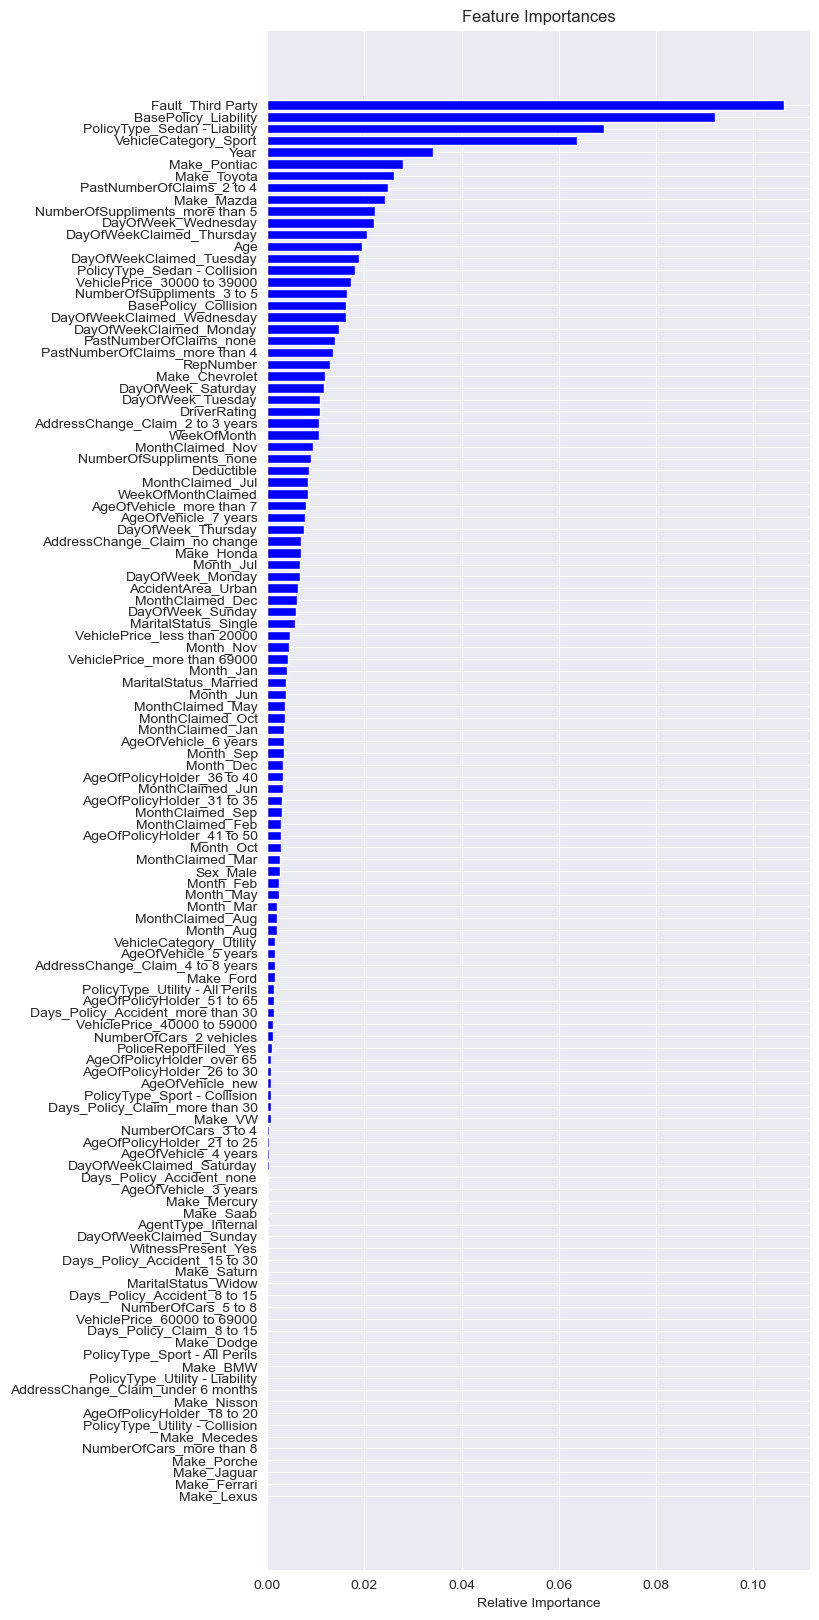

In [84]:

importances = rff.feature_importances_
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = [7.00, 20]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
fi = list(zip(X_res, rff.feature_importances_))

In [86]:
fi

[('WeekOfMonth', 0.010605503402031924),
 ('WeekOfMonthClaimed', 0.008445734273084104),
 ('Age', 0.01951414702286779),
 ('RepNumber', 0.012862480413885708),
 ('Deductible', 0.008504268692457493),
 ('DriverRating', 0.010772297592681383),
 ('Year', 0.03405043608499087),
 ('Month_Aug', 0.0019320676407578743),
 ('Month_Dec', 0.0032420643529959296),
 ('Month_Feb', 0.0024152988309339507),
 ('Month_Jan', 0.004080941720358987),
 ('Month_Jul', 0.006795684050732169),
 ('Month_Jun', 0.003882601416727924),
 ('Month_Mar', 0.0020078804886891925),
 ('Month_May', 0.002349119493487269),
 ('Month_Nov', 0.00447694510934563),
 ('Month_Oct', 0.0027962496945598456),
 ('Month_Sep', 0.0034182368864664634),
 ('DayOfWeek_Monday', 0.006643750830642711),
 ('DayOfWeek_Saturday', 0.011598355029178522),
 ('DayOfWeek_Sunday', 0.005828037888967536),
 ('DayOfWeek_Thursday', 0.007569352612975189),
 ('DayOfWeek_Tuesday', 0.010820535445117338),
 ('DayOfWeek_Wednesday', 0.021926629317684757),
 ('Make_BMW', 1.993022502916776

In [87]:
fi = pd.DataFrame(fi, columns =['Feature', 'Importance'])
fi['Importance'] = fi['Importance'].astype(float)

In [88]:
fi.dtypes

Feature        object
Importance    float64
dtype: object

In [89]:
fi = fi.sort_values('Importance', ascending=False)
fi.reset_index(drop='index',inplace=True)
fi1 = fi.head(30)

In [90]:
list(fi1['Feature'])

['Fault_Third Party',
 'BasePolicy_Liability',
 'PolicyType_Sedan - Liability',
 'VehicleCategory_Sport',
 'Year',
 'Make_Pontiac',
 'Make_Toyota',
 'PastNumberOfClaims_2 to 4',
 'Make_Mazda',
 'NumberOfSuppliments_more than 5',
 'DayOfWeek_Wednesday',
 'DayOfWeekClaimed_Thursday',
 'Age',
 'DayOfWeekClaimed_Tuesday',
 'PolicyType_Sedan - Collision',
 'VehiclePrice_30000 to 39000',
 'NumberOfSuppliments_3 to 5',
 'BasePolicy_Collision',
 'DayOfWeekClaimed_Wednesday',
 'DayOfWeekClaimed_Monday',
 'PastNumberOfClaims_none',
 'PastNumberOfClaims_more than 4',
 'RepNumber',
 'Make_Chevrolet',
 'DayOfWeek_Saturday',
 'DayOfWeek_Tuesday',
 'DriverRating',
 'AddressChange_Claim_2 to 3 years',
 'WeekOfMonth',
 'MonthClaimed_Nov']

### 13.1 IDENTIFYING FEATURES

In [91]:
features1 = ['VehicleCategory_Sport',
             'BasePolicy_Liability',
             'Fault_Third Party',
             'Year',
             'Make_Toyota',
             'PolicyType_Sedan - Collision',
             'Make_Pontiac',
             'PolicyType_Sedan - Liability',
             'NumberOfSuppliments_3 to 5',
             'NumberOfSuppliments_more than 5',
             'BasePolicy_Collision',
             'PastNumberOfClaims_2 to 4',
             'Month_Jul',
             'DayOfWeekClaimed_Wednesday',
             'DayOfWeekClaimed_Thursday',
             'DayOfWeek_Wednesday',
             'VehiclePrice_30000 to 39000',
             'DayOfWeek_Tuesday',
             'PastNumberOfClaims_more than 4',
             'DayOfWeekClaimed_Tuesday',
             'DayOfWeek_Monday',
             'Deductible',
             'MonthClaimed_Nov',
             'Make_Mazda',
             'PastNumberOfClaims_none',
             'AgeOfVehicle_more than 7',
             'Make_Honda',
             'MonthClaimed_Dec',
             'WeekOfMonthClaimed',
             'Age']

### 13.2 APPLY RANDOM FOREST CLASSIFER WITH TOP 30 FEATURES

In [92]:
rff_f = RandomForestClassifier(n_estimators= 100, max_depth= 14)
def rff_smote(X,y):
    rff_f.fit(X, y)
    rf_results = X.copy()
    rf_results['y_pred'] = rff_f.predict(X)
    rf_results['y_real'] = y
    rf_results['y_prob'] = rff_f.predict_proba(X)[:,1]
    rf_results['y_pred'] = np.where(rf_results['y_prob'] > 0.5, 1, 0)
    return rf_results

In [93]:
rf_results3 = rff_smote(X_res[features1], y_res)
get_results(y_res,rf_results3['y_pred'])
rfsf_score = cross_validate(rff_f, X_res[features1], y_res, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
rfsf_score

The confusion matrix for your predictions is:
[[ 9457   685]
 [  137 10005]] 

The accuracy of your model is: 0.9594754486294617
The recall of your model is: 0.9864918162098205
The precision of your model is: 0.9359214218896165
The F1-score of your model is: 0.9605414746543779
The ROC-AUC-score of your model is: 0.9594754486294617


{'fit_time': array([1.24954319, 1.44650388, 1.31011844, 1.21909666, 1.26885986]),
 'score_time': array([0.16378999, 0.15803838, 0.14552426, 0.14085698, 0.17017198]),
 'test_accuracy': array([0.84988908, 0.95070249, 0.95612522, 0.95070249, 0.9561144 ]),
 'test_f1': array([0.83816104, 0.95291902, 0.95793951, 0.95285243, 0.95783989]),
 'test_roc_auc': array([0.9381222 , 0.99325631, 0.99117736, 0.99220584, 0.99243639]),
 'test_matthews_corrcoef': array([0.707184  , 0.90547221, 0.91562342, 0.90513428, 0.91530024])}

## 14. EVALUATING MODELS

### 14.1 ROC CURVE

In [94]:
fpr, tpr, _a = metrics.roc_curve(y_train, lgr_results['Fraud'])
fpr1, tpr1, _b = metrics.roc_curve(y_train,  dt_results['y_prob'])
fpr2,tpr2,_c= metrics.roc_curve(y_train,  rf_results['y_prob'])
fpr3,tpr3,_d= metrics.roc_curve(y_train1,  dtds_results['y_prob'])
fpr4,tpr4,_e= metrics.roc_curve(y_train1,  rf_results1['y_prob'])
fpr5, tpr5,_f= metrics.roc_curve(y_res,dts_results['y_prob'])
fpr6, tpr6,_g= metrics.roc_curve(y_res,rf_results2['y_prob'])
fpr7, tpr7,_h= metrics.roc_curve(y_res,rf_results3['y_prob'])
fpr8, tpr8,_i= metrics.roc_curve(y_res,lgrs_results['Fraud'])

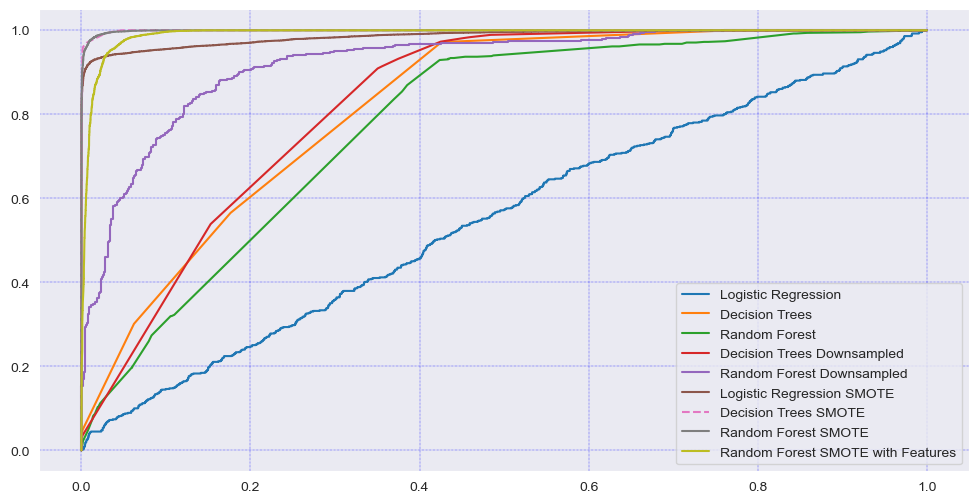

In [95]:


plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,label="Logistic Regression")
plt.plot(fpr1,tpr1,label="Decision Trees")
plt.plot(fpr2,tpr2,label="Random Forest")
plt.plot(fpr3,tpr3,label="Decision Trees Downsampled")
plt.plot(fpr4,tpr4,label="Random Forest Downsampled")
plt.plot(fpr8,tpr8,label="Logistic Regression SMOTE")
plt.plot(fpr5,tpr5,'--',label="Decision Trees SMOTE")
plt.plot(fpr6,tpr6,label="Random Forest SMOTE")
plt.plot(fpr7,tpr7,label="Random Forest SMOTE with Features")


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

### 14.2 COMPARING ALL MODELS

In [189]:
model_name = ['Logistic Regression','Decision Trees', 'Random Forest','Logistic Regression Downsampled', 'Decision Trees Downsampled','Random Forest Downsampled','Logistic Regression SMOTE', 'Decision Trees SMOTE', 'Random Forest SMOTE','Random Forest SMOTE with Feature Selection']
cv_result = [ lgr_score,dt_score,rf_score,lgrds_score, dtds_score,rfds_score,lgrs_score,dts_score,rfs_score,rfsf_score]


results = [{k : v.mean() for k, v in result.items()} for result in cv_result]
df_cv_result = pd.DataFrame(results, index=model_name)

In [190]:
df_cv_result.drop(columns=['fit_time','score_time'],inplace=True)
df_cv_result

,test_accuracy,test_f1,test_roc_auc,test_matthews_corrcoef
Logistic Regression,0.939683,0.000000,0.546606,0.000000
Decision Trees,0.941443,0.069921,0.814383,0.162983
Random Forest,0.939683,0.000000,0.733047,0.000000
Logistic Regression Downsampled,0.551521,0.561413,0.568708,0.103168
Decision Trees Downsampled,0.768974,0.796481,0.816098,0.559649
Random Forest Downsampled,0.767611,0.804899,0.801750,0.580248
Logistic Regression SMOTE,0.950110,0.944551,0.983189,0.907424
Decision Trees SMOTE,0.935911,0.933496,0.941301,0.876028
Random Forest SMOTE,0.953561,0.950476,0.990451,0.911531
Random Forest SMOTE with Feature Selection,0.932707,0.931942,0.981440,0.869743


## 15. ENSEMBLING


#### Can we yield a better result from Ensembling all models after SMOTE was applied?

In [191]:
combined = pd.DataFrame(columns=['lgr_smote', 'dt_smote', 'rf_smote'])
combined['lgr_smote'] = lgrs_results['y_pred']
combined['dt_smote'] = dts_results['y_pred']
combined['rf_smote'] = rf_results2['y_pred']
combined

,lgr_smote,dt_smote,rf_smote
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
20279,1,1,1
20280,1,1,1
20281,1,1,1
20282,1,1,1


In [192]:
combined['emsemble'] = combined.mode(axis='columns')
e_results = X_res.copy()
e_results['y_pred'] = combined['emsemble']
e_results

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Aug,Month_Dec,Month_Feb,...,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,y_pred
0,3,3,29.000000,10,400,2,1994,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4,2,46.000000,1,400,1,1996,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3,4,26.000000,9,400,1,1994,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,3,4,28.000000,6,400,3,1995,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,2,4,28.000000,14,400,4,1994,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20279,3,3,26.000000,1,400,1,1994,0,0,0,...,0,1,0,0,0,0,0,1,0,1
20280,3,1,38.881406,14,500,3,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20281,3,3,26.656250,6,400,3,1994,0,0,0,...,0,1,0,0,0,0,0,0,0,1
20282,1,1,39.000000,5,400,3,1996,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [193]:
get_results(y_res, e_results['y_pred'])

The confusion matrix for your predictions is:
[[9982  160]
 [ 276 9866]] 

The accuracy of your model is: 0.978505225793729
The recall of your model is: 0.9727864326562808
The precision of your model is: 0.9840414921204867
The F1-score of your model is: 0.9783815946053154
The ROC-AUC-score of your model is: 0.978505225793729


In [194]:
a = accuracy(y_res,e_results['y_pred'])
f = f1(y_res,e_results['y_pred'])
roc = roc_auc_score(y_res,e_results['y_pred'])
mcc = metrics.matthews_corrcoef(y_res,e_results['y_pred'])

In [195]:
model_name1 = ['Ensemble from SMOTE models']
e_result = [[a,f,roc,mcc]]

ensemble_result = pd.DataFrame(e_result, index=model_name1, columns = ['test_accuracy','test_f1','test_roc_auc','test_matthews_corrcoef'])

## 16. STACKING

First, I need to assign our Base Learners and then Meta Learner

In [196]:
level0 = list()
level0.append(('dts', dts))
level0.append(('rff', rff))

level1 = lgrs

In [197]:
stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
def stacking(X,y):
    stack.fit(X, y)
    stk_results = X.copy()
    stk_results['y_pred'] = stack.predict(X)
    stk_results['y_real'] = y
    stk_results['y_prob'] = stack.predict_proba(X)[:,1]
    stk_results['y_pred'] = np.where(stk_results['y_prob'] > 0.3, 1, 0)
    return stk_results

In [198]:
stk_results = stacking(X_res, y_res)
get_results(y_res,stk_results['y_pred'])
stk_score = cross_validate(stack, X_res, y_res, cv=5, scoring = ['accuracy', 'f1','roc_auc','matthews_corrcoef'])
stk_score

The confusion matrix for your predictions is:
[[ 9835   307]
 [    6 10136]] 

The accuracy of your model is: 0.9845691185170578
The recall of your model is: 0.9994084007099191
The precision of your model is: 0.9706023173417601
The F1-score of your model is: 0.9847947534612581
The ROC-AUC-score of your model is: 0.9845691185170578


{'fit_time': array([ 9.82114768, 10.38172293,  9.62925863,  9.6086123 ,  9.10545921]),
 'score_time': array([0.18606949, 0.15558243, 0.14292812, 0.17211699, 0.1952436 ]),
 'test_accuracy': array([0.84767069, 0.97978802, 0.9842248 , 0.97880207, 0.98348126]),
 'test_f1': array([0.82241379, 0.98017408, 0.98446602, 0.97920696, 0.98372601]),
 'test_roc_auc': array([0.95701517, 0.99986779, 0.9998814 , 0.99842836, 0.99952295]),
 'test_matthews_corrcoef': array([0.72517392, 0.96032353, 0.96890203, 0.95831247, 0.96740025])}

In [199]:
stack_name= ['Stacking SMOTE Models']
cv_result_stk = [stk_score]

results = [{k : v.mean() for k, v in result.items()} for result in cv_result_stk]
df_cv_result_stk = pd.DataFrame(results, index=stack_name)
df_cv_result_stk.drop(columns=['fit_time','score_time'], inplace=True)

## 17. EVALUATING ALL MODELS INCLUDING ENSEMBLING AND STACKING

In [200]:
df_cv_result = pd.concat([df_cv_result, ensemble_result], ignore_index=False)
df_cv_result = pd.concat([df_cv_result, df_cv_result_stk], ignore_index=False)
df_cv_result

,test_accuracy,test_f1,test_roc_auc,test_matthews_corrcoef
Logistic Regression,0.939683,0.000000,0.546606,0.000000
Decision Trees,0.941443,0.069921,0.814383,0.162983
Random Forest,0.939683,0.000000,0.733047,0.000000
Logistic Regression Downsampled,0.551521,0.561413,0.568708,0.103168
Decision Trees Downsampled,0.768974,0.796481,0.816098,0.559649
Random Forest Downsampled,0.767611,0.804899,0.801750,0.580248
Logistic Regression SMOTE,0.950110,0.944551,0.983189,0.907424
Decision Trees SMOTE,0.935911,0.933496,0.941301,0.876028
Random Forest SMOTE,0.953561,0.950476,0.990451,0.911531
Random Forest SMOTE with Feature Selection,0.932707,0.931942,0.981440,0.869743


In [202]:
df_cv_result.to_csv('Models.csv')

## 18. EVALUATING BEST MODELS ON TEST DATA

### 18.1 APPLYING FEATURE ENGINEERING

In [104]:
X_test_eng = ohe(X_test)

18.2 LOGISTIC REGRESSION

In [105]:
lgrs_test = lre_smote(X_test_eng,y_test)
get_results(y_test,lgrs_test['y_pred'])

The confusion matrix for your predictions is:
[[4347    7]
 [ 270    2]] 

The accuracy of your model is: 0.9401210549070471
The recall of your model is: 0.007352941176470588
The precision of your model is: 0.2222222222222222
The F1-score of your model is: 0.014234875444839857
The ROC-AUC-score of your model is: 0.5028726120673349


C:\Users\mites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 18.2 RANDOM FOREST

In [106]:
rfs_test = rff_smote(X_test_eng,y_test)
get_results(y_test,rfs_test['y_pred'])

The confusion matrix for your predictions is:
[[4354    0]
 [ 205   67]] 

The accuracy of your model is: 0.9556852572416775
The recall of your model is: 0.24632352941176472
The precision of your model is: 1.0
The F1-score of your model is: 0.3952802359882006
The ROC-AUC-score of your model is: 0.6231617647058824


## 18.3 DECISION TREE'S

In [107]:
dtf_test = dtf_smote(X_test_eng,y_test)
get_results(y_test,dtf_test['y_pred'])

The confusion matrix for your predictions is:
[[4324   30]
 [  97  175]] 

The accuracy of your model is: 0.972546476437527
The recall of your model is: 0.6433823529411765
The precision of your model is: 0.8536585365853658
The F1-score of your model is: 0.7337526205450735
The ROC-AUC-score of your model is: 0.8182460685238726


## 18.4 STACKING

In [187]:
stack_test = stacking(X_test_eng,y_test)
get_results(y_test,stack_test['y_pred'])

The confusion matrix for your predictions is:
[[4354    0]
 [  51  221]] 

The accuracy of your model is: 0.9889753566796369
The recall of your model is: 0.8125
The precision of your model is: 1.0
The F1-score of your model is: 0.896551724137931
The ROC-AUC-score of your model is: 0.90625
